In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# View the data

In [11]:
INPUT_MAESTRO_DATA = "MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
variants = pd.read_csv(INPUT_MAESTRO_DATA, sep="\t", low_memory = False)

In [12]:
variants.head()

,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
0,1,1,.MODA.,specs_ms.mgf,960991,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",.GARLIPEMDQIFTEVEMTTLEK.,4,36.905893,36.905893,...,NaN,NaN,1580.81,0,NaN,NaN,1,1,1,8.204159e+03
1,2,2,.MODA.,specs_ms.mgf,763982,"I.[304.207]FTEVEMTTLE(K,304.207).V",.FTEVEMTTLEK.,3,11.686782,11.686782,...,NaN,NaN,1934.91,0,NaN,NaN,1,2,2,4.936894e+05
2,3,3,.MSGFPLUS.,specs_ms.mgf,902201,K.[304.207]LYQPEYQEVSTEEQR.E,.LYQPEYQEVSTEEQR.,3,15.690234,15.690234,...,NaN,NaN,2203.09,0,NaN,NaN,5,6,6,1.951566e+05
3,4,4,.MSGFPLUS.,specs_ms.mgf,935503,"K.[304.207]AANSLEAFIFETQD(K,304.207).L",.AANSLEAFIFETQDK.,3,15.016824,15.016824,...,NaN,NaN,2292.24,0,NaN,NaN,3,4,4,2.877781e+06
4,5,5,.MODA.,specs_ms.mgf,297961,"R.[304.207]YSHDF(N,-56.985)FH.I",.YSHDFNFH.,3,33.768015,33.768015,...,NaN,NaN,1313.66,0,NaN,NaN,3,3,3,7.088440e+04


# Preprocessing(severe or Non-severe)

In [40]:

variants_processed = variants[
    ['Peptide'] + [c for c in variants.columns if 'intensity_for_peptide_variant' in c]
]

variants_processed = variants_processed.copy()

variants_processed.replace(0.0, np.nan, inplace=True)

variants_processed = variants_processed.set_index('Peptide')

variants_processed = variants_processed.T

variants_processed.index = variants_processed.index.map(lambda x: '.'.join(x.split('.')[:2]))
# _dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant	
# _dyn_#Empty.Empty	
variants_processed['Condition'] = variants_processed.index.map(lambda x: x.split('.')[0])

variants_processed

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A",Condition
_dyn_#Empty.Empty,2.459416,0.961707,0.326271,0.878024,0.170619,0.570221,0.574879,0.914939,0.649916,0.017884,...,0.240862,0.787867,1.144694,0.929711,1.007395,0.353838,0.302468,0.735814,1.068300,_dyn_#Empty
_dyn_#Healthy.HC1,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN,_dyn_#Healthy
_dyn_#Healthy.HC10,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Healthy
_dyn_#Healthy.HC12,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Healthy
_dyn_#Healthy.HC13,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,_dyn_#Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622780,0.613630,0.020799,...,0.189781,NaN,NaN,NaN,NaN,NaN,0.143696,NaN,0.118712,_dyn_#Symptomatic-non-COVID-19
_dyn_#Symptomatic-non-COVID-19.JBDZ7,NaN,0.435434,0.200232,NaN,NaN,NaN,NaN,NaN,NaN,0.061746,...,0.247039,0.298399,NaN,NaN,0.670534,0.304344,NaN,NaN,NaN,_dyn_#Symptomatic-non-COVID-19
_dyn_#Symptomatic-non-COVID-19.JBDZ8,NaN,0.736280,0.170478,NaN,NaN,NaN,NaN,NaN,NaN,0.074855,...,0.246862,0.192796,NaN,NaN,1.330314,0.532133,NaN,NaN,NaN,_dyn_#Symptomatic-non-COVID-19
_dyn_#Symptomatic-non-COVID-19.JBDZ9,NaN,0.796550,0.197400,NaN,NaN,NaN,NaN,NaN,NaN,0.053722,...,0.296288,0.335600,NaN,NaN,1.204776,0.549213,NaN,NaN,NaN,_dyn_#Symptomatic-non-COVID-19


In [35]:
# we only need the intensities for each peptide, noted as "...intensity_for_peptide_variant"
variants_processed = variants[
    ['Peptide'] + [c for c in variants.columns if 'intensity_for_peptide_variant' in c]
]

# replace zero values (which are all intensities) in the processed matrix with N/As
variants_processed.replace(0.0, np.nan, inplace=True)

#set the index to be each Peptide
variants_processed = variants_processed.set_index('Peptide')

#transpose the matrix, so each column is a peptide
variants_processed = variants_processed.T
#only retain first two elements in the headers
variants_processed.index = variants_processed.index.map(lambda x: '.'.join(x.split('.')[:2]))

#set the condition to the first element


/var/folders/94/4_45zz7d0rsdx3jwtm2117r40000gn/T/ipykernel_13247/3526170604.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variants_processed.replace(0.0, np.nan, inplace=True)


In [36]:
variants_processed.head()

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
_dyn_#Empty.Empty,2.459416,0.961707,0.326271,0.878024,0.170619,0.570221,0.574879,0.914939,0.649916,0.017884,...,0.521673,0.240862,0.787867,1.144694,0.929711,1.007395,0.353838,0.302468,0.735814,1.0683
_dyn_#Healthy.HC1,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN
_dyn_#Healthy.HC10,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC12,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC13,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Get features with high variants

In [37]:
variants_with_var = variants_processed.var()

In [38]:
variants_with_var

Peptide
K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V      2.194975
I.[304.207]FTEVEMTTLE(K,304.207).V                 0.073197
K.[304.207]LYQPEYQEVSTEEQR.E                       0.120927
K.[304.207]AANSLEAFIFETQD(K,304.207).L             0.150568
R.[304.207]YSHDF(N,-56.985)FH.I                   17.861749
                                                    ...    
K.[304.207]YLGE(E,-68.078)YV(K,304.207).A          0.123235
K.[304.207]YL(G,55.921)EEYV(K,304.207).A           0.152583
K.{187.018}[304.207]YLGEEYV(K,304.207).A           0.195512
R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A     0.359146
K.[304.207]YLGE(E,125.898)YV(K,304.207).A          0.295682
Length: 101461, dtype: float64

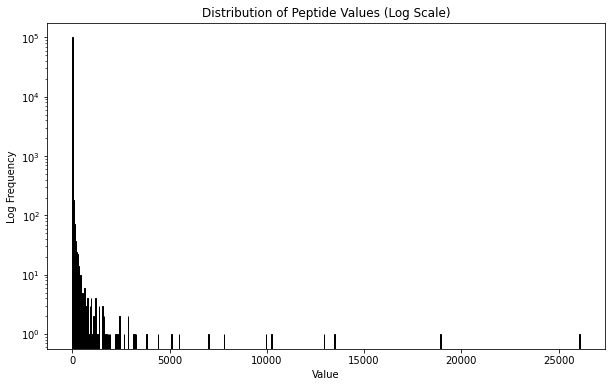

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(variants_with_var, bins=1000, color='blue', edgecolor='black', log=True)
plt.title('Distribution of Peptide Values (Log Scale)')
plt.xlabel('Value')
plt.ylabel('Log Frequency')
plt.show()

In [28]:
variants_with_var = variants_with_var.dropna()
percentile_99 = np.percentile(variants_with_var, 99)
print("Our variants threshold is ", percentile_99)

Our variants threshold is  28.498584305473706


In [30]:
high_variance_features = variants_with_var[variants_with_var > percentile_99]  # keep only values higher than the 99th percentile
high_variance_features.sort_values(ascending=False)


Peptide
K.[304.207](K,304.207)QTALVELV(K,348.165).H                         26088.890097
-.VVKVANGAEMK.-                                                     18926.122211
Q.[304.207]TALVELV(K,304.207).H                                     13465.477596
R.[304.207](F,-57.06)(K,304.207)DLGEENF(K,304.207).A                12939.260643
R.[304.207]LASYLD(K,304.207)VR.A                                    10230.546617
                                                                        ...     
R.[304.207]LVRPEVDVM(C,57.021)TAFH(D,-57.052)NEETFL(K,304.207).K       28.747600
K.[304.207]YI(C,57.021)ENQDS(I,220.139)SS(K,304.207).L                 28.744573
H.[223.076]DNEETFL(K,304.207)(K,304.207).Y                             28.724207
K.[304.207]SH(C,57.021)IAEVENDE(M,274.502)PADLPSLAADFVES.K             28.524576
P.[304.207]ERNE(C,57.021)FL(Q,200.023)H(K,304.207)DDNPNLPR.L           28.511119
Length: 1010, dtype: float64

In [31]:
high_variance_features

Peptide
K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G            120.813133
R.[304.207]YYWGGQYTWD(M,57.025)A(K,304.207).H             223.062094
R.[304.207]YYWGGQ(Y,21.988)TWDMA(K,304.207).H             158.223343
K.[304.207]Q(C,57.021)S(K,304.207)EDGGGWWYNR.C            721.831687
R.[304.207]TMTIHNGM(F,86.852)FSTYDR.D                      41.599431
                                                             ...    
-.ESRAQLGGPEAAKSDETAAK.-                                  279.602876
R.[304.207]QLSSGVSEIR.H                                    76.142606
K.[304.207]YLGEEYV(K,347.1999).A                           60.533134
R.[228.631]NTYE(K,304.207)YLGEEYV(K,304.207).A             68.483757
T.[304.207](Y,-89.109)E(K,304.207)YLGEEYV(K,304.207).A     87.584209
Length: 1010, dtype: float64

In [ ]:
top_6_peptides_data = variants_processed[top_6_peptides_names]
corr_matrix = top_6_peptides_data.corr()

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()
corr_matrix

### From the correlation matrix above, we can see that:

"K.304.207QTALVELV(K,348.165).H" has a correlation of 1.0 with "Q.[304.207]TALVELV(K,304.207).H", and "K.{43.996}[304.207]GSFPWQA(K,304.207).M". We can remove either of them.

"Q.[304.207]TALVELV(K,304.207).H" also has a correlation of 1.0 with "K.{43.996}[304.207]GSFPWQA(K,304.207).M", and "K.304.207QL(K,304.207)AVMDDFAAFVE(K,304.207).C". We can remove either of them.

"R.304.207(K,304.207)DLGEENF(K,304.207).A" has a correlation of 0.999842 with "K.304.207QL(K,304.207)AVMDDFAAFVE(K,304.207).C". We can remove either of them.

In this way, We will remove "K.{43.996}[304.207]GSFPWQA(K,304.207).M" and "K.304.207QL(K,304.207)AVMDDFAAFVE(K,304.207).C" and keep the rest 4 features




In [ ]:
columns_to_keep = ["K.[304.207](K,304.207)QTALVELV(K,348.165).H", 
                   "Q.[304.207]TALVELV(K,304.207).H", 
                   "R.[304.207](F,-57.06)(K,304.207)DLGEENF(K,304.207).A", 
                   "R.[304.207]LASYLD(K,304.207)VR.A"]

variants_processed = variants_processed[columns_to_keep]


### This are 4 features we got from corrlation analysis and variants analysis we got 



In [ ]:
variants_processed

### TODO:
    1. var distribution data, get top 1%; bar graph, Y -> count X -> value
    2. correlation, select top 6 to get corrlations, legend to show which 6 petitode
    3. only get 100 petitde
    

3. Scatter Graph, numercic data, one column to see distribution
4. Bar Graph, category